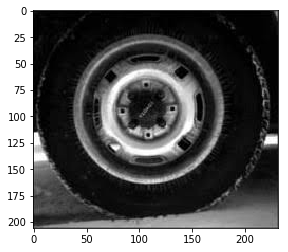

In [9]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('tire.tif', cv2.IMREAD_GRAYSCALE)
img.shape
plt.imshow(img, cmap = 'gray')

In [11]:
freq_pixel = np.zeros((256))
for i in img:
    for j in i:
        freq_pixel[j] += 1
p = []  
for i in range(256):
    p.append(freq_pixel[i] / img.size)
  

In [12]:
prefix_sum = list(p)
for i in range(1, len(prefix_sum)):
    prefix_sum[i] += prefix_sum[i - 1]
   

In [13]:
m, n = img.shape[0], img.shape[1]
new_img = img.copy()
def compute_fn(intensity_value, prefix_sum):
    return math.floor(255 * prefix_sum[intensity_value])
for i in range(m):
    for j in range(n):
        new_img[i, j] = compute_fn(new_img[i, j], prefix_sum)

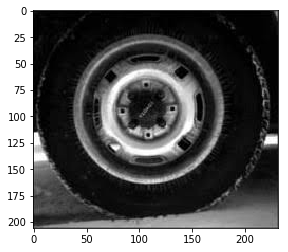

In [14]:
plt.imshow(img, cmap = 'gray')


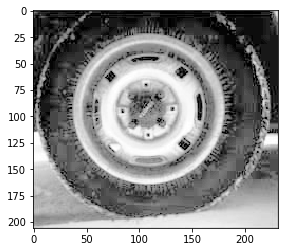

In [15]:
plt.imshow(new_img, cmap = 'gray')

In [16]:
inp = cv2.imread('tire.tif', cv2.IMREAD_GRAYSCALE)
out = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

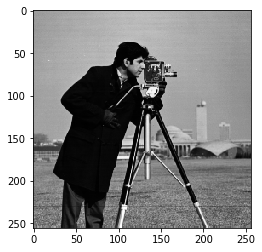

In [17]:
plt.imshow(out, cmap = 'gray')

In [18]:
def histogram_equalization(img):
    freq_pixel = np.zeros((256))
    for i in img:
        for j in i:
            freq_pixel[j] += 1
    p = []
    for i in range(256):
        p.append(freq_pixel[i] / img.size)
        
    prefix_sum = list(p)
    for i in range(1, len(prefix_sum)):
        prefix_sum[i] += prefix_sum[i - 1]
        
    m, n = img.shape[0], img.shape[1]
    new_img = img.copy()
    
    mapping = np.zeros((256))
    for i in range(256):
        mapping[i] = compute_fn(i, prefix_sum)
        
    for i in range(m):
        for j in range(n):
            new_img[i, j] = compute_fn(new_img[i, j], prefix_sum)
            
    plt.imshow(new_img, cmap = 'gray')
    return mapping

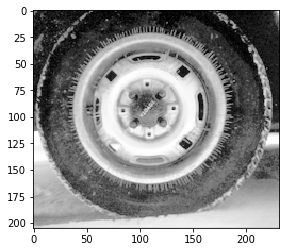

In [33]:
mapping_inp = histogram_equalization(inp)

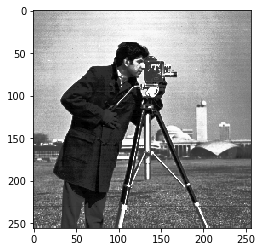

In [34]:
mapping_out = histogram_equalization(out)

In [20]:
# mapping_inp

In [19]:
# mapping_out

In [37]:
def compute_mapping(mapping_inp, mapping_out):
    new_mapping = np.zeros((256))
    for ind1, i in enumerate(mapping_inp):
        for ind2, j in enumerate(mapping_out):
            if j >= i:
                new_mapping[ind1] = ind2
                break
    return new_mapping

In [41]:
new_mapping = compute_mapping(mapping_inp, mapping_out)

In [39]:
final_img = inp.copy()

In [40]:
m, n = final_img.shape[0], final_img.shape[1]

In [42]:
for i in range(m):
    for j in range(n):
        final_img[i, j] = new_mapping[final_img[i, j]] 

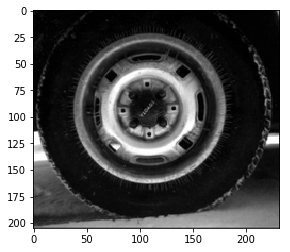

In [43]:
plt.imshow(inp, cmap = 'gray')

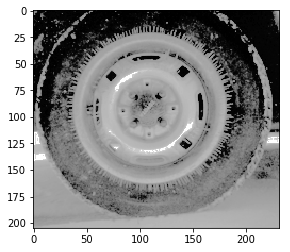

In [44]:
plt.imshow(final_img, cmap = 'gray')

In [46]:
new_mapping

array([  9.,  10.,  13.,  14.,  15.,  17.,  27.,  44.,  62.,  88., 103.,
       113., 120., 125., 129., 132., 135., 137., 140., 141., 143., 144.,
       145., 146., 147., 148., 148., 149., 150., 150., 151., 152., 152.,
       153., 153., 154., 154., 155., 155., 156., 156., 156., 157., 157.,
       158., 158., 158., 158., 159., 159., 159., 159., 160., 160., 160.,
       160., 160., 161., 161., 161., 161., 162., 162., 162., 162., 162.,
       162., 163., 163., 163., 163., 163., 164., 164., 164., 164., 165.,
       165., 165., 165., 165., 165., 166., 166., 166., 166., 166., 166.,
       167., 167., 167., 167., 167., 167., 167., 168., 168., 168., 168.,
       168., 168., 169., 169., 169., 169., 169., 170., 170., 170., 170.,
       170., 171., 171., 171., 171., 171., 172., 172., 172., 172., 172.,
       172., 173., 173., 173., 173., 173., 174., 174., 174., 175., 175.,
       175., 175., 175., 175., 176., 176., 176., 177., 177., 177., 177.,
       177., 177., 178., 178., 178., 178., 178., 17

In [50]:
inp_freq = np.zeros((256))
for i in inp.flatten():
    inp_freq[i] += 1

out_freq = np.zeros((256))
for i in final_img.flatten():
    out_freq[i] += 1

<BarContainer object of 256 artists>

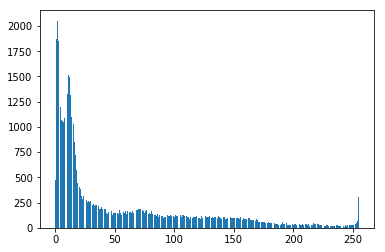

In [53]:
plt.bar(range(256), inp_freq)

<BarContainer object of 256 artists>

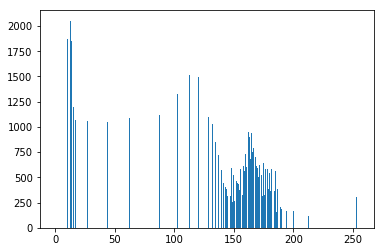

In [54]:
plt.bar(range(256), out_freq)

<BarContainer object of 256 artists>

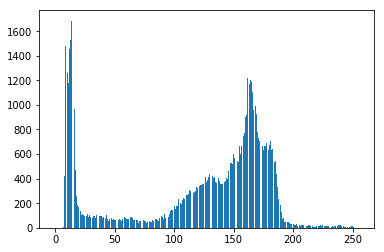

In [56]:
out_img_freq = np.zeros((256))
for i in out.flatten():
    out_img_freq[i] += 1

plt.bar(range(256), out_img_freq)